# Proyecto 03 - Procesamiento del Lenguaje Natural

Estudiante: Mónica Lorena Ortiz Medina

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [ ]:
# Paso 1: Abrir las bases de datos 

import json
from google.colab import files
uploaded = files.upload()

Saving dataset_es_dev.json to dataset_es_dev.json
Saving dataset_es_test.json to dataset_es_test.json
Saving dataset_es_train.json to dataset_es_train.json


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import spacy


In [ ]:
df1=pd.read_json("/content/dataset_es_dev.json", lines=True)
df2=pd.read_json("/content/dataset_es_test.json", lines=True)
df3=pd.read_json("/content/dataset_es_train.json", lines=True)

df1

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless


In [ ]:
df2

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


In [ ]:
df3

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


**Parte A - Exploración de Datos**

1.   El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga. 
2.   Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.




En primer lugar, resulta necesario conocer qué variables o columnas tienen las diferentes bases de datos en cada archivo json. 
1. 

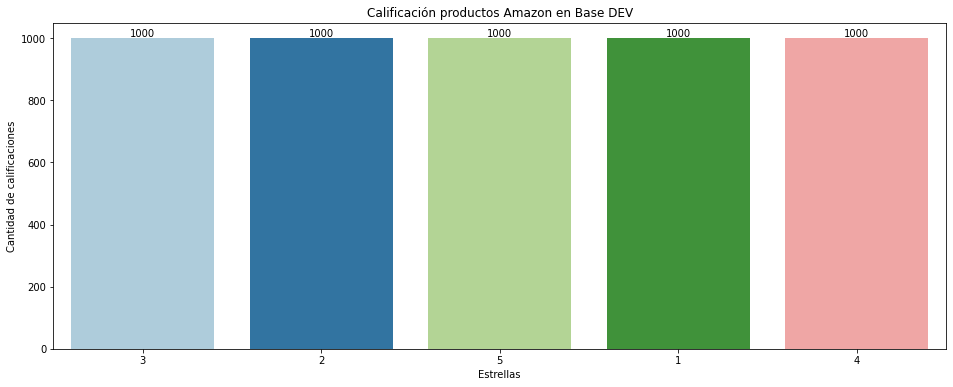

In [ ]:
plt.figure(figsize=(16, 6))

plot1=sns.countplot(data = df1, x = 'stars', palette='Paired', order=df1['stars'].value_counts().index)
plt.title("Calificación productos Amazon en Base DEV")
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de calificaciones')


for i in plot1.patches: 
  plot1.annotate(format(i.get_height()), (i.get_x()+i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.show()

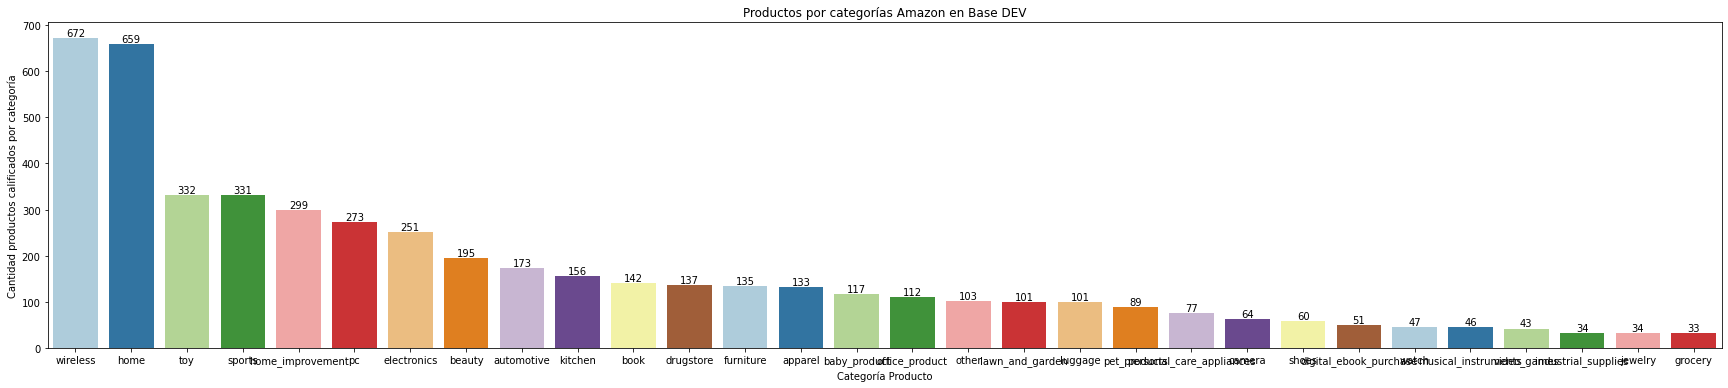

In [ ]:
plt.figure(figsize=(30, 6))

plot1=sns.countplot(data = df1, x = 'product_category', palette='Paired', order=df1['product_category'].value_counts().index)
plt.title("Productos por categorías Amazon en Base DEV")
plt.xlabel('Categoría Producto')
plt.ylabel('Cantidad productos calificados por categoría')


for i in plot1.patches: 
  plot1.annotate(format(i.get_height()), (i.get_x()+i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.show()




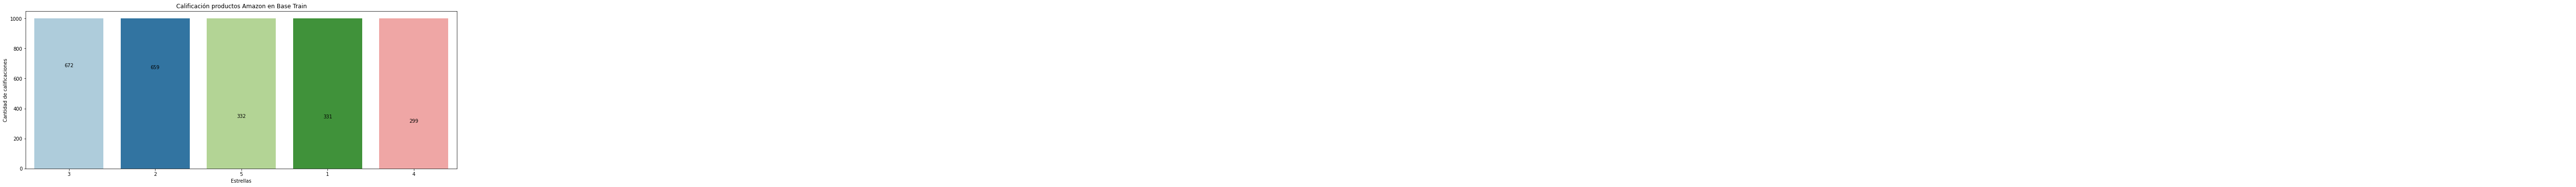

In [ ]:
plt.figure(figsize=(16, 6))

plot2=sns.countplot(data = df2, x = 'stars', palette='Paired', order=df2['stars'].value_counts().index)
plt.title("Calificación productos Amazon en Base Train")
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de calificaciones')


for i in plot1.patches: 
  plot2.annotate(format(i.get_height()), (i.get_x()+i.get_width()/2., i.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.show()

In [ ]:
df1['stars'].value_counts()

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64

In [ ]:
df2['stars'].value_counts()

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64

In [ ]:
df3['stars'].value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

De esta exploración adicional se tiene que las bases de datos 1 y 2 tienen el mismo número de observaciones (5.000) equitativamente distribuidas en las 5 posibles puntuaciones. La base 3 de entrenamiento, tiene 200.000 observaciones equitativamente distribuídas en las 5 puntuaciones posibles. 

Exploración: 

Cada estrella misma cantidad de registros. 

Es más fácil hacer positivo y negativo, basándose también en la distribución de palabras que tiene la descripción/comentario. La intensidad de los adjetivos positivos y negativos que permita clasificarlos en estas dos categorías. 

In [ ]:
import nltk
top_N = 50
word_dist = nltk.FreqDist(df3['review_title'])
print('Frecuencias Train Dataset sobre los Reviews')
print('='*60)
lista_palabras=pd.DataFrame(word_dist.most_common(top_N),columns=['Palabra','Frecuencia'])

print(lista_palabras)
print ('='*60)

Frecuencias Train Dataset sobre los Reviews
                          Palabra  Frecuencia
0                            Bien        1952
1                        Perfecto        1768
2                   Buen producto        1484
3                         Regular        1283
4                    Buena compra        1206
5                    Mala calidad        1040
6                          Genial         850
7                        Correcto         831
8                   Buena calidad         801
9                           Bueno         676
10                       Muy bien         621
11                   Recomendable         604
12                    No funciona         508
13               No lo recomiendo         480
14                      Muy bueno         462
15                      Decepción         455
16                      Excelente         412
17                      Aceptable         400
18  Buena relación calidad precio         398
19              Cumple su función   

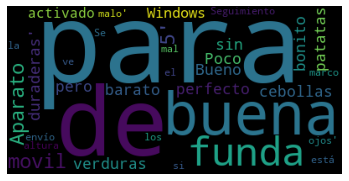

In [ ]:
from wordcloud import WordCloud


df4=df3[df3.stars==3]

texto=df4['review_title'].values
wordcloud=WordCloud().generate(str(texto))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Para depurar un poco la base de datos se eliminan las columnas que no representan ningún aporte al ejercicio. 

In [ ]:
#Eliminación de variables sin aporte
#df3.language.value_counts()
#df3.drop(['language'], axis='columns', inplace=True)
df3.drop(['review_id'], axis='columns', inplace=True)
df3.drop(['product_id'], axis='columns', inplace=True)
df3.drop(['reviewer_id'], axis='columns', inplace=True)

Dado que es más sencilla una clasificación binaria y no de cinco categorías a continuación se busca clasificar estas cinco posibilidades entre positivas y negativas. En el primer caso, se incluirán las de 4 y 5 estrellas; para el segundo, las más bajas, es decir 1 y 2 estrellas. 

Finalmente, la puntuación de 3 estrellas no es ni buena ni mala, para evitar sesgar el ejercicio esta puntuación se reservará. 





In [ ]:
cal_positiva = df3[(df3.stars == 4)|(df3.stars == 5)]
cal_positiva.sample(10)

,stars,review_body,review_title,language,product_category
131001,4,"Me encanta, sencillo de usar",Sencillo de usar,es,home
163076,5,"Llego rapido, y ha quedado perfecto.",Funda mas vidrio templado,es,wireless
151138,4,Trazar la línea es fácil y la tinta dura bien ...,Buen producto,es,beauty
170923,5,De momento no la he utilizado pero tiene muy b...,Tamaño y precio,es,sports
185908,5,Muy buena calidad. Pero si se va a utulizar en...,Lo comprare nuevamente,es,home_improvement
196274,5,No se encuentran árboles de Navidad por este p...,Lo recomiendo 100%,es,home
148353,4,Producto muy bien terminado y de calidad. Prob...,Buen producto,es,sports
193477,5,Tal y como viene en la foto y su precio muy bien,Lo volveria a comra,es,beauty
196300,5,Un pla excelente para dar ese efecto marmol co...,PLA Marmol excelente,es,industrial_supplies
140436,4,Cumple su función. Es bonita,Bien,es,furniture


In [ ]:
cal_negativa = df3[(df3.stars == 1)|(df3.stars == 2)]
cal_negativa.sample(10)

,stars,review_body,review_title,language,product_category
72158,2,Muele más rápido las pilas que la pimienta...,Bueno pero No!,es,home
4438,1,No es compatible. Me están dando muchos proble...,No compatible con mi impresora HP,es,office_product
1577,1,"EL PRODUCTO NO LLEGAMOS A RECIBIRLO, COMPROBAR...",ARTICULO NO RECIBIDO,es,home
75576,2,"Estábamos encantados con el producto, pero de ...",Devolución,es,baby_product
57228,2,Un cacho plástico sin más. A ver lo que dura,Plastiquete,es,home
35228,1,Mala calidad me llego usado,Negativo,es,wireless
37638,1,"No funciona con Windows 10, probados en tres e...","No funciona con Windows 10, probados en tres e...",es,pc
11532,1,"No me llegó nunca, no puedo opinar","No me llegó nunca, no puedo opinar",es,home_improvement
9566,1,A día de hoy aún no lo he recibido,"Después de casi un mes, sigo sin recibirlo",es,home
68709,2,El producto correcto en cuanto a embalaje y to...,Faltan algunas piezas.,es,toy


In [ ]:
cal_neutro = df3[(df3.stars == 3)]
cal_neutro.sample(10)

,stars,review_body,review_title,language,product_category
95358,3,Útil aunque con el tiempo algunas. aves pasan ...,Util,es,lawn_and_garden
107751,3,Exactamente es como en la foto. La pega es que...,Es lo que promete,es,home
88353,3,No puedo opinar porque el producto nunca llegó...,"No llego jamás a destino, producto de China",es,toy
117634,3,Me hubiera gustado un 1cm más grande para dond...,Bordado del parche excelente,es,kitchen
93024,3,Lo encargue para mi padre y de momento le va b...,Esta bien por el precio,es,wireless
84601,3,Quizá un poco más anchos y más largos serían a...,Bien,es,wireless
91372,3,"Veremos si va bien , pasado un tiempo por ahor...",practicidad,es,home
95588,3,"Las zaptillas no está mal, físicamente son tal...",No aptas para todos los pies,es,shoes
100115,3,"Cumple, le doy 3 estrellas pues la entrega nac...",Genial,es,musical_instruments
113412,3,Tiene la comodida de las zapatillas de ésta ma...,Cómodos pero material externo es regular,es,shoes


Puesto que el cuerpo y el título de la recomendación pueden contener palabras clave que sean de utilidad para el ejercicio vale la pena concatenarlas en una sola columna que recoja la información.

In [ ]:
cal_positiva["review_full"] = cal_positiva["review_title"] +" "+ cal_positiva["review_body"]
cal_positiva.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stars,review_body,review_title,language,product_category,review_full
120000,4,"Tiene buena pinta, veremos el resultado",Calidad,es,sports,"Calidad Tiene buena pinta, veremos el resultado"
120001,4,Entrega rápida como siempre pero falta factura,Falta factura,es,wireless,Falta factura Entrega rápida como siempre pero...
120002,4,Está bien y envío rápido,Bueno,es,pc,Bueno Está bien y envío rápido
120003,4,"Queda muy bien, material duradero y tamaño per...",Material duradero,es,home,"Material duradero Queda muy bien, material dur..."
120004,4,Genial aunque huele mucho a pegamento,Buena,es,personal_care_appliances,Buena Genial aunque huele mucho a pegamento


In [ ]:
cal_negativa["review_full"] = cal_negativa["review_title"] +" "+ cal_negativa["review_body"]
cal_negativa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stars,review_body,review_title,language,product_category,review_full
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada


In [ ]:
cal_neutro["review_full"] = cal_neutro["review_title"] +" "+ cal_neutro["review_body"]
cal_neutro.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stars,review_body,review_title,language,product_category,review_full
80000,3,"cabe bien un móvil de 5,5 y cumple su función ...","buena funda para movil 5,5",es,wireless,"buena funda para movil 5,5 cabe bien un móvil ..."
80001,3,El aparato tiene un tamaño perfecto. Y la embo...,"Aparato perfecto para verduras (no cebollas, n...",es,kitchen,"Aparato perfecto para verduras (no cebollas, n..."
80002,3,"La luces llegaron en tiempo y bien, las ocho f...",Poco duraderas,es,home,Poco duraderas La luces llegaron en tiempo y b...
80003,3,"No sé puede apagar, está todo el rato consumie...",Lo peor es el apagado,es,home,"Lo peor es el apagado No sé puede apagar, está..."
80004,3,Vino sin la goma ajustable en la tapa y si pon...,Le faltó la goma a la tapa para que ajuste bien.,es,home,Le faltó la goma a la tapa para que ajuste bie...


Facilitando la lectura de la información el siguiente paso es convertir todo el texto en letras minúsculas y eliminar las stopwords.  

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) - set(['no'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cal_positiva["review_full"] = cal_positiva["review_full"].str.lower()
cal_negativa["review_full"] = cal_negativa["review_full"].str.lower()
cal_neutro["review_full"] = cal_neutro["review_full"].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

**Pregunta a resolver: ¿Cuáles son las palabras más comunes para acompañar una calificación positiva (4 y 5 estrellas) y una negativa (1 y 2 estrellas)?**

Utilizando nuevamente una nube de palabras será posible identificar en cada set de calificaciones cuál es la palabra más usada para denotar el puntaje positivo o negativo. 

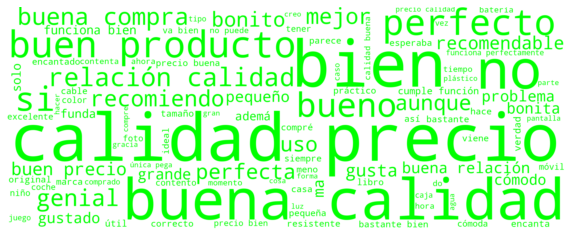

In [ ]:
word_positivo = " ".join(review for review in cal_positiva.review_full)  
wordcloud = WordCloud(width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "lime", max_words = 100).generate(word_positivo)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

De las palabras positivas se destaca la relación calidad-precio, perfecto, bien, buen/bueno/buena, recomendable/recomiendo, genial, encanta. Resulta extraño encontrar la palabra "problema" y "aunque" que podrían ser propios de una calificación negativa. 

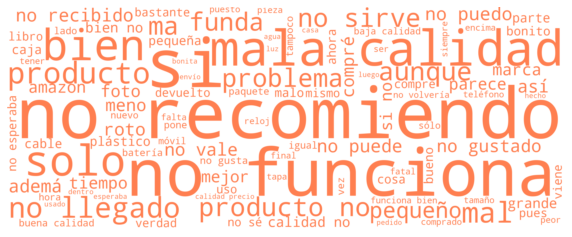

In [ ]:
word_negativo = " ".join(review for review in cal_negativa.review_full)  
wordcloud = WordCloud(width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "coral", max_words = 100).generate(word_negativo)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

Por su lado, las palabras más usadas en este caso es "mala calidad", "no" relacionado con "funciona", "sirve", "recibido". En este caso también se denotan expresiones como "no vale", "llegado" acompañado posiblemente de problema" y "solo".

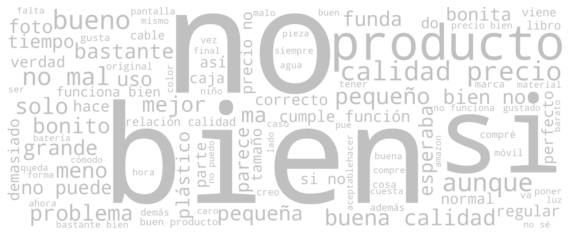

In [ ]:
word_neutro = " ".join(review for review in cal_neutro.review_full)  
wordcloud = WordCloud(width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "silver", max_words = 100).generate(word_neutro)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

Finalmente, en el caso de la clasificación enutra, se encuentra esa discrepancia de "si" y "no", "bien", "aunque", "esperaba". Palabras que en general podrían presentar esa ni satisfacción pero no insatisfacción completa. 

Con la clasificación propia de cada una de las segmentaciones:positiva, negativa y neutra, se logra dar respuesta a la pregunta de las palabras más comunes para recomendar o mostrar insatisfacción con un producto comprado online en Amazon. 

**Parte B - Modelo de Machine Learning**

 

1.   Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

2.   Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.



3. Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset? 

**Se expone en las conclusiones en detalle. A lo largo de esta sección se expone el paso a paso de tratamiento de datos, su justificación, modelación, mejoras a esta modelación y un análisis de varios algoritmos atendiendo métricas de precisión y F1 score para compararlas.**






En primer lugar se generará el modelo que pueda predecir de manera más adecuada la puntuación del producto. Para alcanzar este objetivo es relevante normalizar los textos y extraer las palabras más relevantes con el fin de que el algoritmo pueda con más facilidad hacer la generalización. 


In [ ]:
import gc #garbage collector
gc.collect()

8872

*Instalación de Scipy*

In [ ]:
from scipy import *
!pip install deplacy
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2MB 5.8MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp37-none-any.whl size=16172936 sha256=1bbe053b3fd611f62a41cecc179a39e91120a64d64d0d70260983f19bae55ed4
  Stored in directory: /tmp/pip-ephem-wheel-cache-jcgypqsr/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
!pip install deplacy
!python -m spacy download es_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
nlp=spacy.load("es_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


*Datasets a utilizar: train, test y dev*

In [ ]:
df3["review_full"] = df3["review_title"] +" "+ df3["review_body"]
df2["review_full"] = df2["review_title"] +" "+ df2["review_body"]
df1["review_full"] = df1["review_title"] +" "+ df1["review_body"]

Ahora de cada dataset se eliminan las columnas no útiles para realizar la modelación. En este caso la revisión concatenada nos servirá de variable independiente y la dependiente o la que queremos que el algoritmo prediga será "stars"

In [ ]:
bd_train = df3[["stars","review_full"]]
bd_test = df2[["stars","review_full"]]
bd_dev = df1[["stars","review_full"]]

Finalmente es relevante normalizar cada uno de los datasets. Para ello se utiliza la siguiente función: 

In [ ]:
def normalize(columna):
    normalizada = []
    for i in range(columna.shape[0]):
        review = columna[i] #seleccionar review_full
        review = nlp(review)
        #tokenizar y lemmatizar con spacy, quitando signos de puntuación y números
        review = [tok.lemma_.lower() for tok in review if tok.pos_ != 'PUNCT' and tok.pos_ != 'NUM'] 
        review = [word for word in review if word not in stop_words] # Filtrar por stopwords
        review=" ".join(review) #unimos nuevamente la review
        normalizada.append(review) #agregar el resultado a la lista
    return normalizada

Aplicando la normalización para el dataset de entrenamiento: 

In [ ]:
#Ahora normalizamos el dataset de train
train_norm = normalize(bd_train.review_full)

In [ ]:
df3_normalizado = pd.DataFrame({'reviews': train_norm,'stars': bd_train.stars})
df3_normalizado.head()

,reviews,stars
0,television nevir bueno ser ka pantalla menos m...,1
1,dinero tirar basura comprar horrible no tener ...,1
2,solo llegar unidad obligar comprar obligar com...,1
3,producto no recibido no entrar descalificar ve...,1
4,devuelto llega tardar co tallar equivocar,1


In [ ]:
from google.colab import files
df3_normalizado.to_csv('DSTrain_Normalized.csv') 
files.download('DSTrain_Normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Ahora normalizamos el dataset de test
test_norm = normalize(bd_test.review_full)

In [ ]:
df3test_normalizado = pd.DataFrame({'reviews': test_norm,'stars': bd_test.stars})
df3test_normalizado.head()

,reviews,stars
0,no llegar no llegar articular mandar correo no...,1
1,amazon seguir cumplir entregar mensajería horr...,1
2,estafa envío decepcionar vendedor pedir no lle...,1
3,estafa amazon valoración no ser sobrar product...,1
4,no conseguir pasar portar kindle pues tener in...,1


In [ ]:
from google.colab import files
df3test_normalizado.to_csv('DSTest_Normalized.csv') 
files.download('DSTest_Normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Ahora normalizamos el dataset de dev
dev_norm = normalize(bd_dev.review_full)

In [ ]:
df3dev_normalizado = pd.DataFrame({'reviews': dev_norm,'stars': bd_dev.stars})
df3dev_normalizado.head()

,reviews,stars
0,mala comprar malisimo grande demasiar aparatos...,1
1,no haber recibir no haber recibir pedir no dev...,1
2,no apretar bien manillar buscar sistema no fun...,1
3,brocas mantequilla utilicé broca menor diámetr...,1
4,no gustar no gustar olor viejo aspecto malo,1


In [ ]:
from google.colab import files
df3dev_normalizado.to_csv('DSDev_Normalized.csv') 
files.download('DSDev_Normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DSDev_Normalized.csv to DSDev_Normalized.csv
Saving DSTest_Normalized.csv to DSTest_Normalized.csv
Saving DSTrain_Normalized.csv to DSTrain_Normalized.csv


In [2]:
dftrain_norm = pd.read_csv("/content/DSTrain_Normalized.csv")
dftest_norm = pd.read_csv("/content/DSTest_Normalized.csv")
dfdev_norm = pd.read_csv("/content/DSDev_Normalized.csv")

Del proceso realizado se tiene el conjunto de palabras, no obstante estas deben ser representadas en forma de vector en el cual se le asigne un número que permita hacer una clasificación. 

La función CountVectorizer convierte una colección de texto en un vector con dummies o variables binarias, es decir que tendrá el valor de 1 en las palabras que contiene la característica estudiada y 0 en las que no, por ejemplo "bien" podría ser parte del set de interés de palabras positivas. 

Una estrategia que permite descartar errores en esta tarea es usar solo las palabras con una mayor frecuencia en el texto. 


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

Se usarán las 2.500 palabras con mayor frecuencia en el corpus para acotar el universo de posibilidades y a partir de ellas se generarán los vectores. A continuación se instancia y se crearán los n-gramas por defecto del CountVectorizer que es 1. 

In [33]:
max_features=2500

cv=CountVectorizer(max_features=max_features)

In [34]:
#Entrenamos y transformamos el set de train
train_vec = cv.fit_transform(dftrain_norm.reviews)

A continuación se reconvierte el vector de palabras con el fin de poder observar qué palabras fueron vectorizadas (de forma aleatoria por ello se importa random), 30 palabras. 

In [35]:
all_words = cv.get_feature_names()

import random
print("Palabras seleccionadas de forma aleatoria: ",random.sample(all_words, 30))

Palabras seleccionadas de forma aleatoria:  ['barbar', 'debería', 'oxidar', 'bajito', 'marcar', 'express', 'mojar', 'momento', 'maravilloso', 'fragil', 'tardo', 'armario', 'finalmente', 'impedir', 'meter', 'precioso', 'roturar', 'agujero', 'lavador', 'manejar', 'avanzar', 'utilidad', 'suave', 'porqué', 'volcar', 'problemas', 'expectativa', 'instalarlo', 'coger', 'compensar']


Ahora para tener los dos grupos train y test de la misma forma, se vectoriza el dataset de testeo, se transforma de la misma forma que el train pero no se entrena para que tome exactamente los mismos parámetros seleccionados para el dataset de entrenamiento. A continuación se separan los datos de los dataset de entrenamiento y testeo.

In [36]:
test_vec = cv.transform(dftest_norm.reviews)

In [37]:
x_train = train_vec.toarray()
x_test = test_vec.toarray()
y_train = dftrain_norm.stars
y_test = dftest_norm.stars

**Modelación**

**1.Gaussian Naive Bayes**

La primera prueba puede realizarse con el algoritmo "Gaussian Naive Bayes" usado en problemas de clasificación como este. Este método es de aprendizaje mo supervisado y se basa en el teorema de bayes (independencia condicional entre características dado el valor de la clase). En primer lugar se importan las métricas y el algoritmo y luego se procede al fit. 


In [38]:
from sklearn.metrics import plot_confusion_matrix,f1_score
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Con el objetivo de analizar la precisión de este método que es sencillo. Sin embargo como se observa es de 0.39, lo cual es bajo. 

In [39]:
print("Métrica de Precisión: ", gaussian.score(x_test,y_test))

Métrica de Precisión:  0.387


No obstante para tener más información del modelo, se predice y se saca el F1 score. Como se ve en la siguiente línea, la precisión pasa de cifras cercanas a 0.5 a 0.2 en las etiquetas que son intermedias, es decir que el modelo tiene dificultades para predecir allí. 

In [40]:
y_pred = gaussian.predict(x_test)

In [41]:
print("Métrica de F1-Score: ",f1_score(y_test, y_pred, average=None))

Métrica de F1-Score:  [0.56278643 0.23968566 0.22397892 0.21667761 0.49415385]


Con estos resultados es útil graficar la matriz de confusión ya que como se observó, el modelo presenta dificultad en la predicción intermedia (así lo muestran los cuadrantes al comparar lo predicho y el label). Lo anterior se puede resolver con el uso de algoritmos distintos que logren capturar mejor esta situación y mitigue las dificultades. 

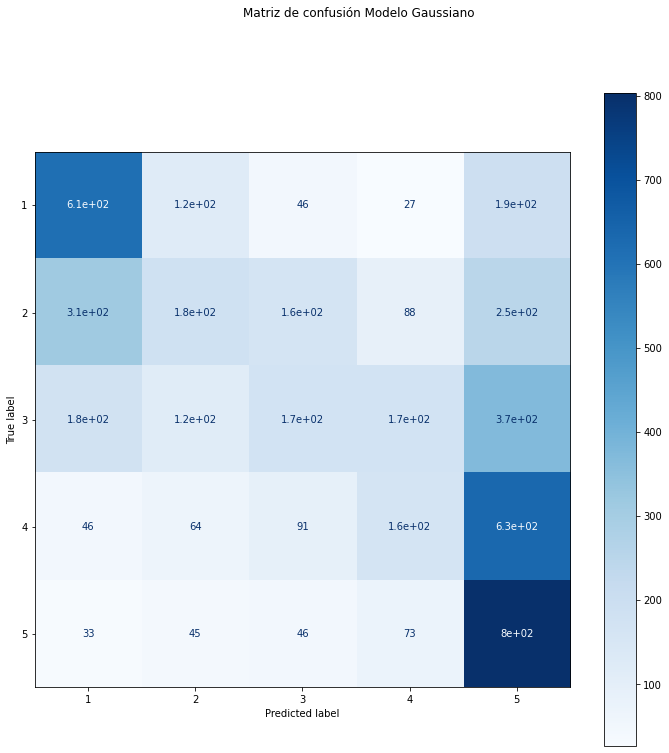

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
confusion_matrix1 = plot_confusion_matrix(gaussian, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Modelo Gaussiano")
plt.grid(False)
plt.show()

**2. Random Forest**

Random forest es un algoritmo de utilidad para la clasificación. En este método el estimador se ajusta a varios clasificadores de árboles de decisión en varias submuestras del conjunto de datos y usa promedios para mejorar la precisión predictiva y controlar el posible overfitting.

En primer lugar se importa el algoritmo y se procede al fit. 

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Siguiendo con las métricas de precisión, se evalúa este modelo. Se observa que comparado con el anterior, la métrica arroja un valor más alto. Pero se hará la predicción del modelo y posterior cálculo del F1 score con el fin de ver si lo que se observa en el anterior modelo para las etiquetas intermedias se repite. 

In [45]:
print("Métrica de Precisión: ", random_forest.score(x_test,y_test))

Métrica de Precisión:  0.4924


In [46]:
y_pred = random_forest.predict(x_test) 

print("Métrica de F1-Score: ",f1_score(y_test, y_pred, average=None))

Métrica de F1-Score:  [0.66517257 0.38764643 0.37704055 0.40315789 0.58795411]


Aunque mejora, el incremento en esta métrica no es signitificativamente alto comparado con lo observado en el anterior modelo. Observando la matriz de confusión, esta dificultad se hace evidente nuevamente. 

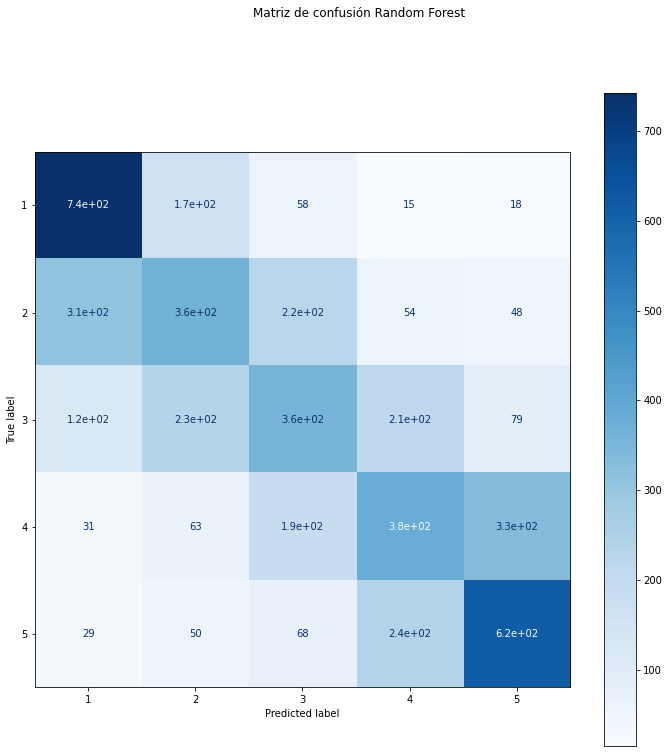

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(random_forest, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Random Forest")
plt.grid(False)
plt.show()

Dado que estamos usando un modelo de random forest vale la pena analizar cuál es la importancia de los features. Como se observa en la gráfica de abajo, un feature determinante es la palabra "no" seguido de "perfecto", los cuales permiten ver mejor lo que sucede con los intermedios donde es más difícil con una sola palabra identificar cuál debe ser la clasificación correcta. "No" es indicativo claro de una experiencia negativa, en tanto "perfecto" de una positiva. 

Enseguida salen palabras como buen,bueno, encantar, llegar o calidad que hacen alusión al estado del producto, descripciones y hasta el si pudo haber llegado o no. Sin embargo una sola palabra es insuficiente para definir clasificación intermedia pues bueno puede ser neutro para alguien que, en otro escenario pudo haber escrito "me encanta" si es que el producto fue extraordinario. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


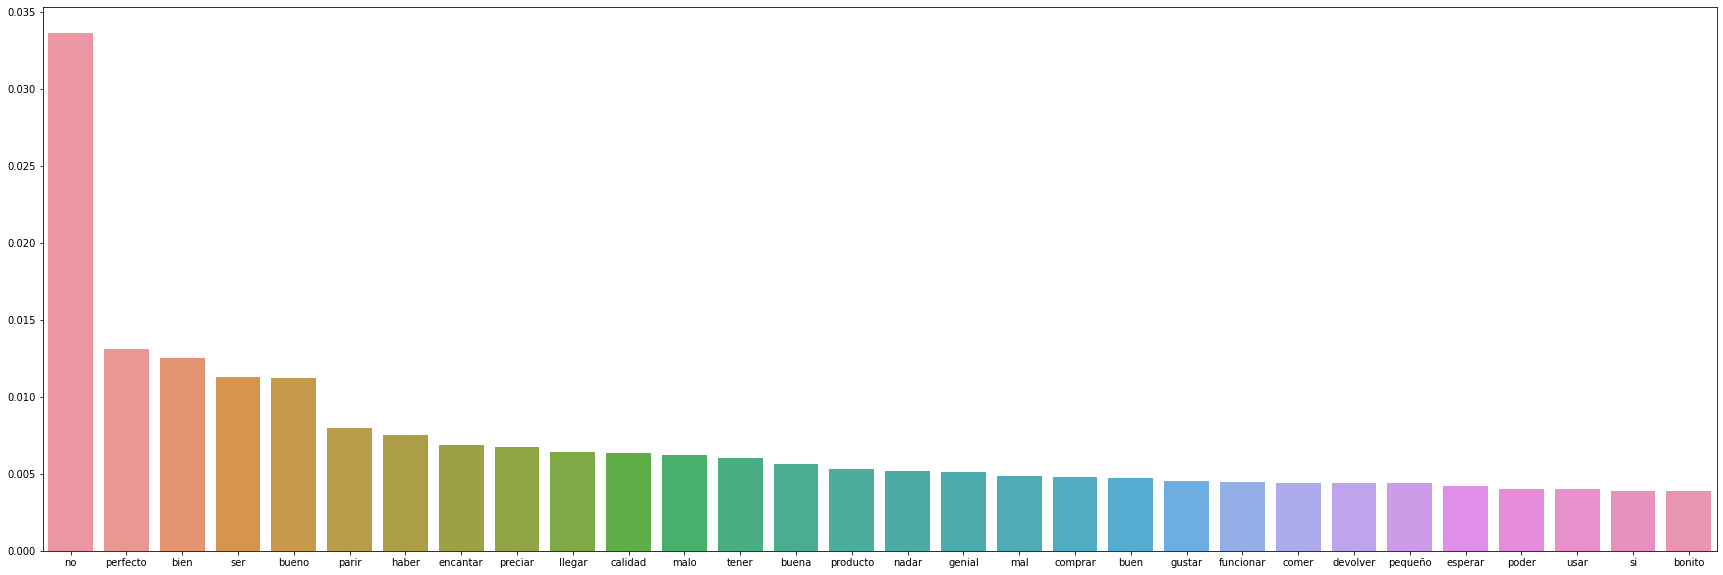

In [48]:
importances = random_forest.feature_importances_
columns = all_words #lista palabras

# Orden de importancia
indices = np.argsort(importances)[::-1] #Decreciente
indices = indices[:30] #Primeros 30 valores
selected_columns = [columns[i] for i in indices] #Valor por palabra
selected_importances = importances[indices] #Orden de palabras por valores 

plt.figure(figsize = (30,10))
sns.barplot(selected_columns, selected_importances)
plt.show()

**3. Linear Support Vector Classification**

Este algoritmo también corresponde a aprendizaje supervisado y es usado para problemas como el actual que es de clasificación. Una de las ventajas de los modelos que vienen dentro del Support Vector es que es eficaz en un espacio de gran dimensión y es versátil para establecer "núcleos comunes". 

El primer paso es importar el algoritmo seguido del fit. 

In [49]:
from sklearn.svm import LinearSVC

In [ ]:
support_linear = LinearSVC(max_iter=4000,random_state=0,dual=False)
support_linear.fit(x_train,y_train)

La precisión de este algoritmo es más alta que la de los otros dos, poco a poco se va logrando incrementar en esta métrica el valor. 

In [ ]:
print("Métrica de Precisión: ", support_linear.score(x_test,y_test))

Siguiendo la metodología para analizar paso a paso los anteriores modelos, se predice y el F1 score. Sin embargo se obtiene un resultado muy cercano al del modelo anterior de bosque aleatorio, el intermedio continúa siendo un reto para clasificar de manera correcta. Esto también se observa en la matriz de confusión. 

In [ ]:
y_pred = support_linear.predict(x_test)

print("Métrica de F1-Score: ",f1_score(y_test, y_pred, average=None))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(support_linear, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Linear Support Vector")
plt.grid(False)
plt.show()

**Mejorando el modelo**

Al aumentar el número de n-gramas de la vectorización realizada es posible que mejore el modelo de clasificación en los obstáculos encontrados en las etiquetas intermedias modelo a modelo. 

En general hasta acá es claro que el modelo sencillo de Gaussian Bayes es el menos potente de los 3 analizados. Dado esto se aumentará el número de n-gramas y se correrá para los últimos 2: Random Forest y Linear SV. 


Del corpus se usará solo las 3.000 palabras con mayor frecuencia para acotar el universo de posibilidades pero es un set 500 palabras superior al vectorizado anteriormente en caso de que las palabras restantes sean de utilidad para los intermedios, y se aumentan los n-gramas a 3. 

A continuación se transforma el set de datos. 

In [4]:
max_features=3000

cv2=CountVectorizer(max_features=max_features, ngram_range=(1,3))

In [5]:
train_vec2 = cv2.fit_transform(dftrain_norm.reviews)

Ahora, de la misma forma que se hizo anteriormente, y observaremos, del vector transformado, 30 palabras aleatorias incluidas. Al ampliar los n-gramas ya no se tienen palabras únicas como "bueno" sino que se puede observar expresiones más completas como "tener bueno calidad", "parecer caro".

In [6]:
all_words2 = cv2.get_feature_names()
import random
print("Palabras al azar: ",random.sample(all_words2, 30))

Palabras al azar:  ['cuanto', 'funcionar comer', 'describir', 'golpe', 'ser demasiar pequeño', 'meter', 'poder utilizar', 'cobertura', 'simple', 'satisfecho', 'normalmente', 'aguar', 'bien problema', 'saber si', 'caja rotar', 'dar', 'cobrar', 'ser marcar', 'no devolver', 'mes', 'si no ser', 'parir poder', 'nunca llegar', 'no poner', 'impresor', 'haber manera', 'no cumplir expectativa', 'esperar producto', 'gustar nadar', 'hacer casar']


Ahora se transforman los datasets de entrenamiento y dev. A continuación se separan las variables de target (y) y las explicativas (x) para cada dataset. 

In [7]:
test_vec2 = cv2.transform(dftest_norm.reviews)
test_dev2 = cv2.transform(dfdev_norm.reviews)

In [8]:
xtrain = train_vec2.toarray()
xtest = test_vec2.toarray()
xdev = test_dev2.toarray()
ytrain = dftrain_norm.stars
ytest = dftest_norm.stars
ydev = dfdev_norm.stars

**Modelación con mejoras**

Como se mencionó anteriormente, esta vez se usarán los algoritmos de Random Forest y Linear SV dados los resultados obtenidos. 

**1. Random Forest**

Primero se ajustan los hiperparámetros del modelo y se procede al fit. A continuación se estudia el resultado con la métrica de precisión sobre el x e y de testeo. La métrica no mejora y de hecho permanece casi idéntica a la estimada antes de cambiar los n-gramas. 

In [14]:
random_forest2 = RandomForestClassifier(random_state=0)
random_forest2.fit(xtrain,ytrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
print("Métrica de Precisión: ", random_forest2.score(xtest,ytest))

Métrica de Precisión:  0.4978


Continuando con la lógica anterior se evalúa el F1 score y se grafica la matriz de confusión. Esta vez se observa una ligera mejora en el F1 score pero sigue mostrando ahora una mayor dificultad en el grado exactamente intermedio que es la calificación 3. 

In [16]:
from sklearn.metrics import plot_confusion_matrix,f1_score

ypred = random_forest2.predict(xtest) 

print("Métrica de F1-Score: ",f1_score(ytest, ypred, average=None))

Métrica de F1-Score:  [0.65396825 0.40839895 0.37984085 0.41139241 0.59838786]


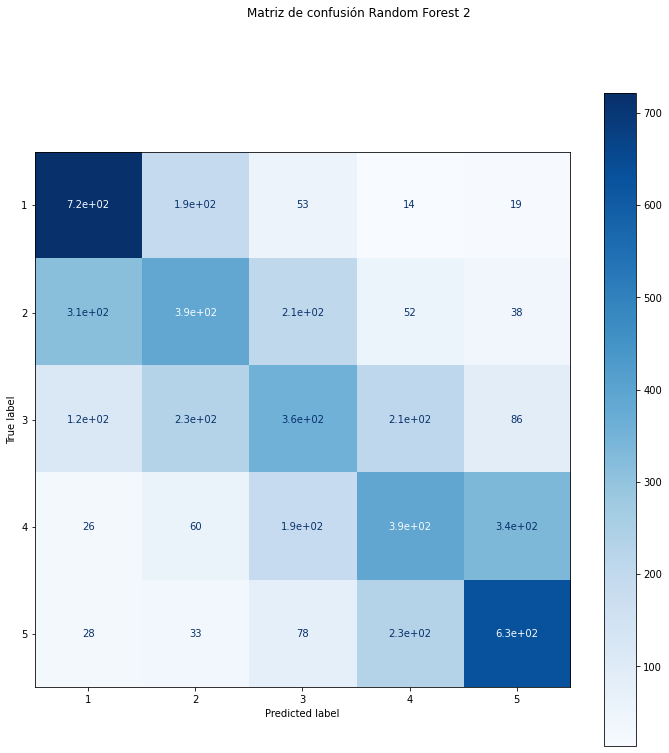

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(random_forest2, xtest, ytest, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Random Forest 2")
plt.grid(False)
plt.show()

Ahora, observando los features más importantes se podrá observar lo que sucedió con esas expresiones compuestas de las que se hablaba anteriormente. 

De la gráfica a continuación se observa que "no" y "perfectamente" continúan siendo claves en la clasificación. De otra parte, en las 30 primeras palabras no se observa ninguna expresión compuesta como importante. 

Ampliando el universo a las primeras 50 tampoco se encuentra este comportamiento. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


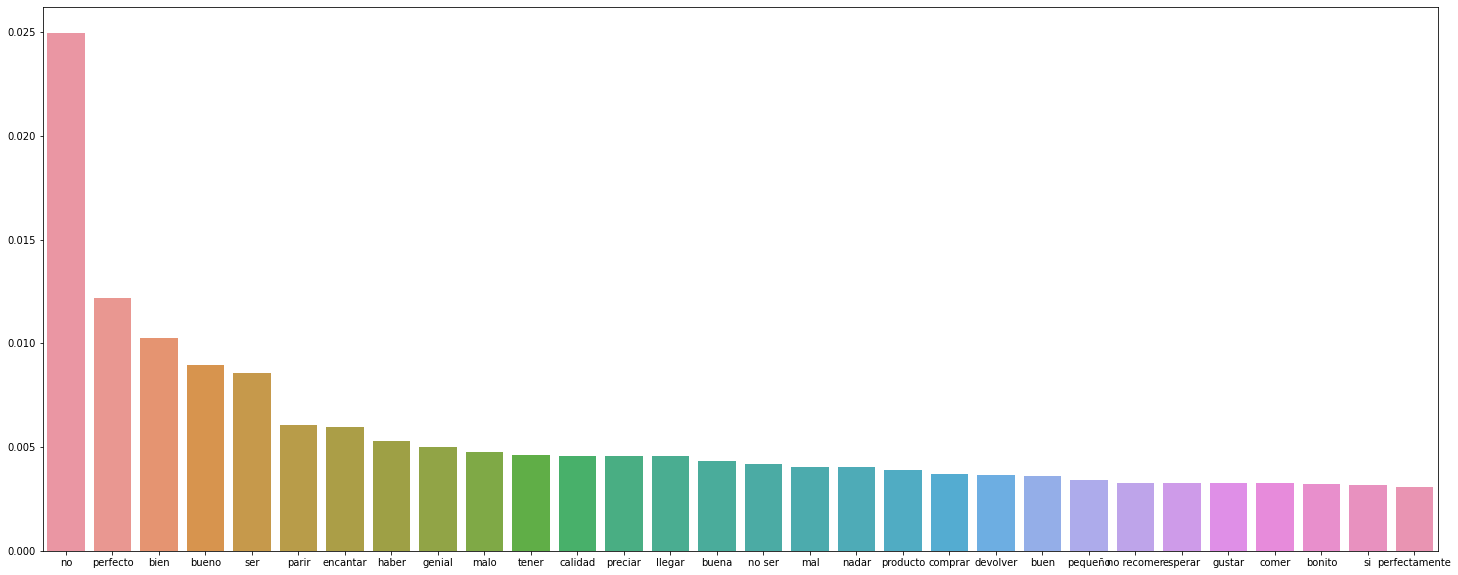

In [23]:
importances = random_forest2.feature_importances_
columns = all_words2

indices = np.argsort(importances)[::-1] 
indices = indices[:30] 
selected_columns = [columns[i] for i in indices] 
selected_importances = importances[indices] 

plt.figure(figsize = (25,10))
sns.barplot(selected_columns, selected_importances)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


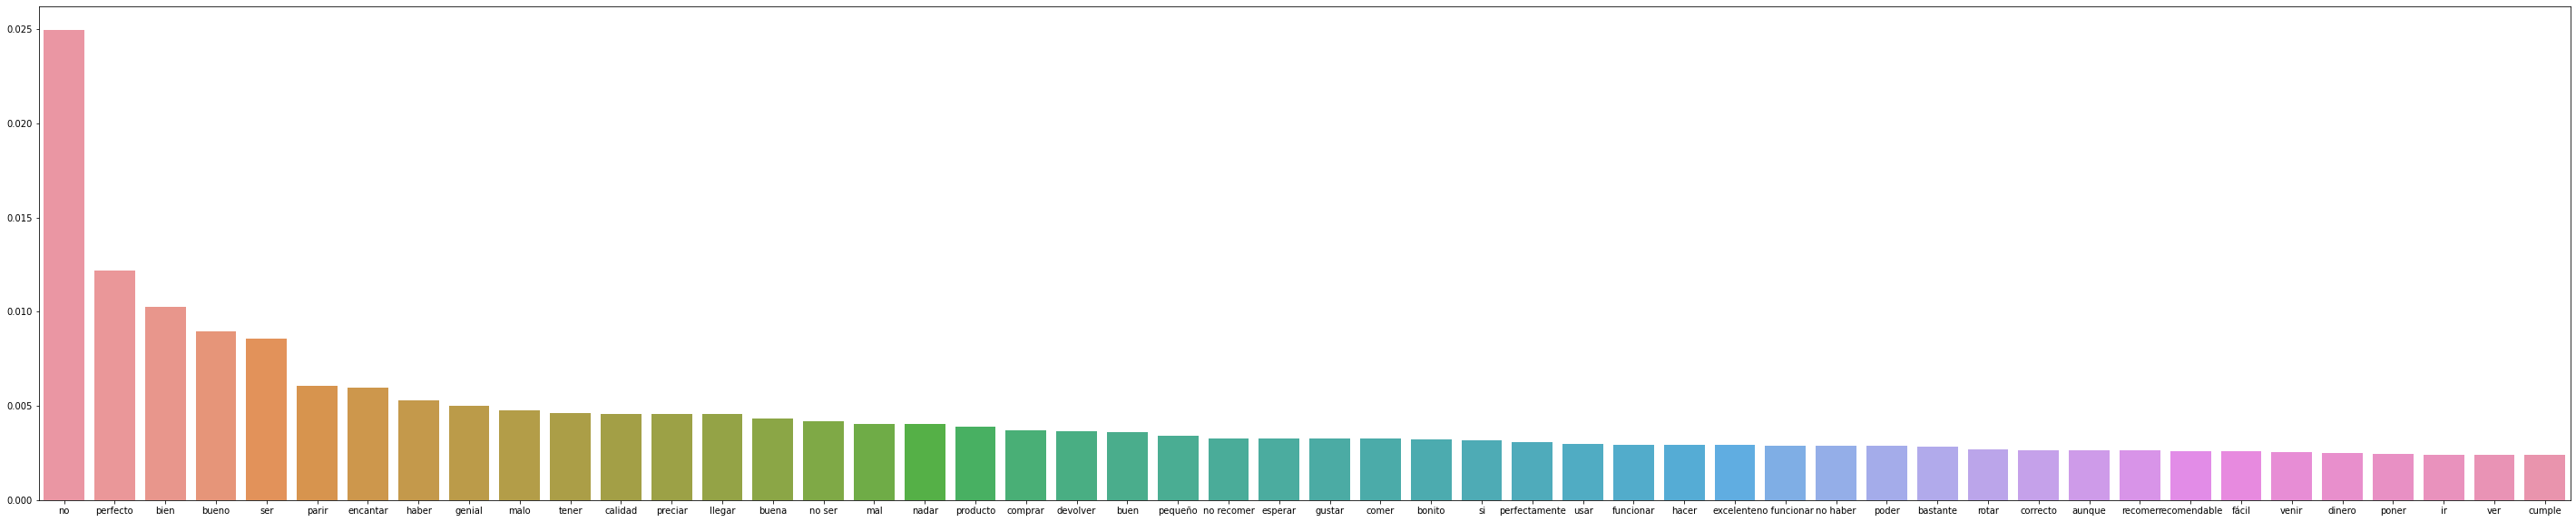

In [26]:
importances = random_forest2.feature_importances_
columns = all_words2

indices = np.argsort(importances)[::-1] 
indices = indices[:50] 
selected_columns = [columns[i] for i in indices] 
selected_importances = importances[indices] 

plt.figure(figsize = (50,10))
sns.barplot(selected_columns, selected_importances)
plt.show()

**2. Linear Support Vector**

Se seguirán los mismos pasos recorridos para los modelos anteriores incluyendo las métricas y la matriz de confusión

In [9]:
from sklearn.svm import LinearSVC

In [10]:
support_linear2 = LinearSVC(max_iter=4000,random_state=0,dual=False)
support_linear2 .fit(xtrain,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=4000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

De la métrica de precisión se observan valores cercanos al 0.5 que continúa siendo bajo y versus el anterior no mejora significativamente.

In [11]:
print("Métrica de Precisión: ", support_linear2 .score(xtest,ytest))

Métrica de Precisión:  0.5396


No obstante, en este caso, con el F1 score se observa una menor dificultad para capturar mejor la calificación 3 si se compara con Random Forest. Lo anteior también se observa en la matriz de confusión. 

In [13]:
ypred = support_linear2.predict(xtest) 
from sklearn.metrics import plot_confusion_matrix,f1_score
print("F1-Score: ",f1_score(ytest, ypred, average=None))

F1-Score:  [0.68869242 0.45529291 0.40225352 0.45648775 0.65128901]


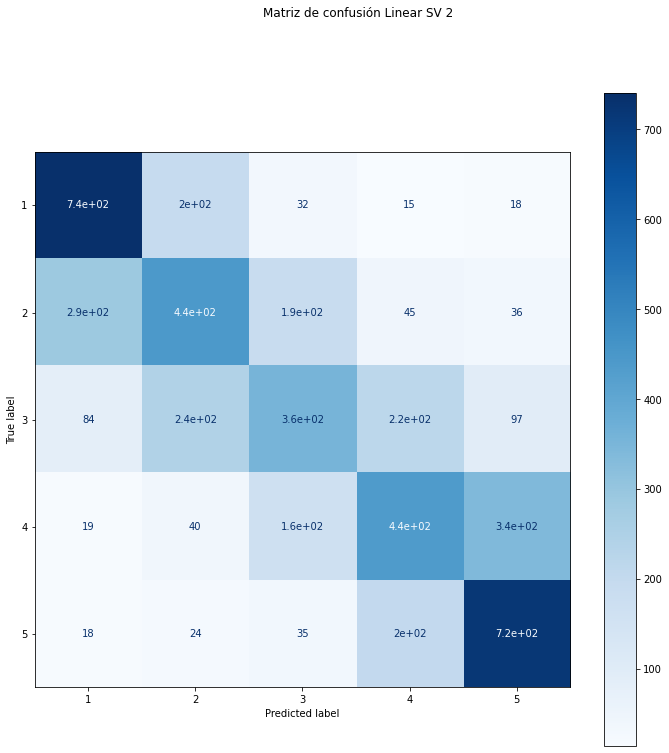

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(support_linear2, xtest, ytest, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Linear SV 2")
plt.grid(False)
plt.show()

**¿Qué sucede con el dataset dev?**

Como se observa a continuación, la métrica de precisión es muy similar a la obtenida con el dataset de test así como la del F1 score. 

In [16]:
print("Métrica de Precisión: ", support_linear2 .score(xdev,ydev))

Métrica de Precisión:  0.5374


In [19]:
ypred = support_linear2.predict(xdev)

print("F1-Score: ",f1_score(ydev, ypred, average=None))

F1-Score:  [0.67510167 0.43644068 0.42193621 0.44573849 0.65677013]


**Resolución del problema tras el análisis**

Dadas las dificultades no del todo subsanadas con la clasificación de las calificaciones intermedias, pensar en el problema de una forma binaria (positivo o negativo) puede ser una mejor alternativa. 


A continuación se separará el dataset, donde 1 y 2 estrellas serán negativas, 4 y 5 positivas, y la 3 se descarta. En este sentido el problema será una dummy en donde 1 es positivo y 0 es negativo manteniendo la coherencia del problema. 


Para ello trabajamos nuevamente con nuestros 3 datasets normalizados y a continuación hacemos la partición de los mismos entre positivos y negativos. 

In [3]:
dftrain_norm = pd.read_csv("/content/DSTrain_Normalized.csv")
dftest_norm = pd.read_csv("/content/DSTest_Normalized.csv")
dfdev_norm = pd.read_csv("/content/DSDev_Normalized.csv")

In [4]:
train_negativo = dftrain_norm[(dftrain_norm.stars == 1)|(dftrain_norm.stars == 2)]
train_positivo = dftrain_norm[(dftrain_norm.stars == 4)|(dftrain_norm.stars == 5)]
test_negativo = dftest_norm[(dftest_norm.stars == 1)|(dftest_norm.stars == 2)]
test_positivo = dftest_norm[(dftest_norm.stars == 4)|(dftest_norm.stars == 5)]
dev_negativo = dfdev_norm[(dfdev_norm.stars == 1)|(dfdev_norm.stars == 2)]
dev_positivo = dfdev_norm[(dfdev_norm.stars == 4)|(dfdev_norm.stars == 5)]

Unos para la calificación positiva y ceros para la negativa.

In [5]:
train_positivo["dummy_califica"] = np.ones((len(train_positivo,)),dtype=int)
test_positivo["dummy_califica"] = np.ones((len(test_positivo,)),dtype=int)
dev_positivo["dummy_califica"] = np.ones((len(dev_positivo,)),dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
train_negativo["dummy_califica"] = np.zeros((len(train_negativo,)),dtype=int)
test_negativo["dummy_calificat"] = np.zeros((len(test_negativo,)),dtype=int)
dev_negativo["dummy_califica"] = np.zeros((len(dev_negativo,)),dtype=int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

*Se juntan, limpian y resetean de los datasets*

In [7]:
train_ds = pd.concat([train_positivo, train_negativo])
test_ds = pd.concat([test_positivo, test_negativo])
dev_ds = pd.concat([dev_positivo,dev_negativo])

In [8]:
train_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
test_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)
dev_ds.drop(["Unnamed: 0", "stars"], axis = 1, inplace=True)

In [23]:
train_ds.reset_index(inplace=True, drop=True)
test_ds.reset_index(inplace=True, drop=True)
dev_ds.reset_index(inplace=True, drop=True)

In [26]:
train_ds.reset_index()
test_ds.reset_index()
dev_ds.reset_index()

,index,reviews,dummy_califica
0,0,gran jugar llave robusto francamente cumplir c...,1
1,1,funcional estupenda relación calidad preciar,1
2,2,compactar cómodo comprar parir madre contento ...,1
3,3,bien estrecho vale pintura,1
4,4,nice dar estrellar aun no haber probar % día l...,1
...,...,...,...
3995,3995,ana maria pequeño pensar ser grande no gustar ...,0
3996,3996,capsulas café segundar vez comprar primero vez...,0
3997,3997,no funcionado decir aparato ir bien tener acné...,0
3998,3998,no recomendar parir beber bebé nadar precisar ...,0


Dado que los procesos son pesados, se descargan los datasets para facilidad de inicio en este punto. 

In [28]:
from google.colab import files
train_ds.to_csv('DSTrain.csv') 
files.download('DSTrain.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
from google.colab import files
test_ds.to_csv('DSTest.csv') 
files.download('DSTest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from google.colab import files
dev_ds.to_csv('DSDev.csv') 
files.download('DSDev.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Volvemos a la vectorización, pero esta vez continuamos con 3 n-gramas dado que se pudo ver que mejoraba la clasificación.

Nuevamente usamos 2000 palabras del corpus (no hace mucha diferencia) y transformamos los 3 datasets (train, test , dv), y partimos los datasets en la variable target (y) y la explicativa (x). 

In [38]:
from google.colab import files
uploaded = files.upload()

Saving DSDev.csv to DSDev (1).csv
Saving DSTest.csv to DSTest (1).csv
Saving DSTrain.csv to DSTrain (1).csv


In [68]:
dftrain_ds = pd.read_csv("/content/DSTrain.csv")
dftest_ds = pd.read_csv("/content/DSTest.csv")
dfdev_ds = pd.read_csv("/content/DSDev.csv")

In [69]:
max_features=2000

cv3=CountVectorizer(max_features=max_features, ngram_range=(1,3))

train_vec3 = cv3.fit_transform(dftrain_ds.reviews)

In [70]:
test_vec3 = cv3.transform(dftest_ds.reviews)
dev_vec3 = cv3.transform(dfdev_ds.reviews)

In [71]:
xtrain_3 = train_vec3.toarray()
xtest_3 = test_vec3.toarray()
xdev_3 = dev_vec3.toarray()
ytrain_3 = train_ds.dummy_califica
ytest_3 = test_ds.dummy_califica
ydev_3 = dev_ds.dummy_califica

**Modelación: Linear SV**

Dado que este modelo tuvo mejores resultados se usará este algoritmo. 

In [14]:
from sklearn.svm import LinearSVC

In [72]:
support_linear3 = LinearSVC(C=1,random_state=1,dual=False)
support_linear3.fit(xtrain_3,ytrain_3)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

Esta vez lo probamos con el dataset dev que es más amplio y permite probar de un dataset que no ha conocido el algoritmo probar su eficacia. 

In [74]:
print("Métrica de Precisión: ", support_linear3.score(xdev_3, ydev_3))

Métrica de Precisión:  0.91175


Como se observa el modelo es mucho mejor y tiene una muy buena precisión, este incremento es significativo comparado con los anteriores modelos. Esto también se observa en el F1 score y en la misma línea en la matriz de confusión.


A pesar de la mejora en los resultados, podría existir un overfitting que la explique. A continuación de la matriz de confusión vale la pena estudiar si con una técnica de cross-validation hay alguna diferencia, eliminado esta posible sospecha. 

In [75]:
ypred_dev = support_linear3.predict(xdev_3)

print("F1-Score dev: ",f1_score(ydev_3, ypred_dev))

F1-Score dev:  0.9114622523200401


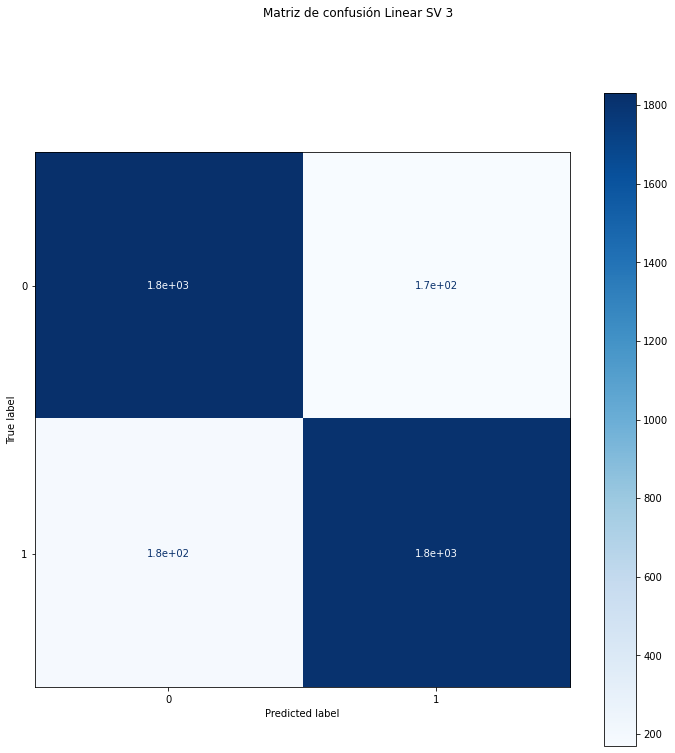

In [78]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(support_linear3, xdev_3, ydev_3, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Linear SV 3")
plt.grid(False)
plt.show()

**Testeo posible overfitting**

Primero se importa el cross validation score y KFold. A continuación se estima una métrica de accuracy o precisión para los valores de entrenamiento, luego para el dev. 

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(shuffle=True, n_splits=10) #se mezclan los folds

scores = cross_val_score(support_linear3, xtrain_3, ytrain_3, cv=kf)
print("Métrica de Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Métrica de Precisión: 0.92 (+/- 0.01)


In [80]:
scores = cross_val_score(support_linear3, xdev_3, ydev_3, cv=kf)
print("Métrica de Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Métrica de Precisión: 0.86 (+/- 0.03)


Con estos resultados se puede ver que el accuracy en los datos de entrenamiento es de 0.92 y que en el caso del dev es de 0.86 (disminuye). Sin embargo el resultado continúa siendo bueno y el ajuste a la clasificación correcta con el algoritmo usado es muy buena. 

**Comparación con Random Forest**

Para lograr un benchmark con lo estimado anteriormente usamos este algoritmo que fue el segundo que mejores resultados arrojó antes. 

In [82]:
random_forest3 = RandomForestClassifier(random_state=0)
random_forest3.fit(xtrain_3,ytrain_3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Con este modelo la precisión es un poco más baja sin embargo mejora mucho comparado con los anteriores random forest estimados antes. Este resultado se replica para el F1 score. 

En todo caso el Linear SV es superior por poco en estas métricas en cerca de 0.03. 

In [83]:
print("Métrica de Precisión: ", random_forest3.score(xdev_3, ydev_3))

Métrica de Precisión:  0.889


In [84]:
ypred_dev = random_forest3.predict(xdev_3)

print("Métrica de F1-Score: ",f1_score(ydev_3, ypred_dev))

Métrica de F1-Score:  0.8882175226586102


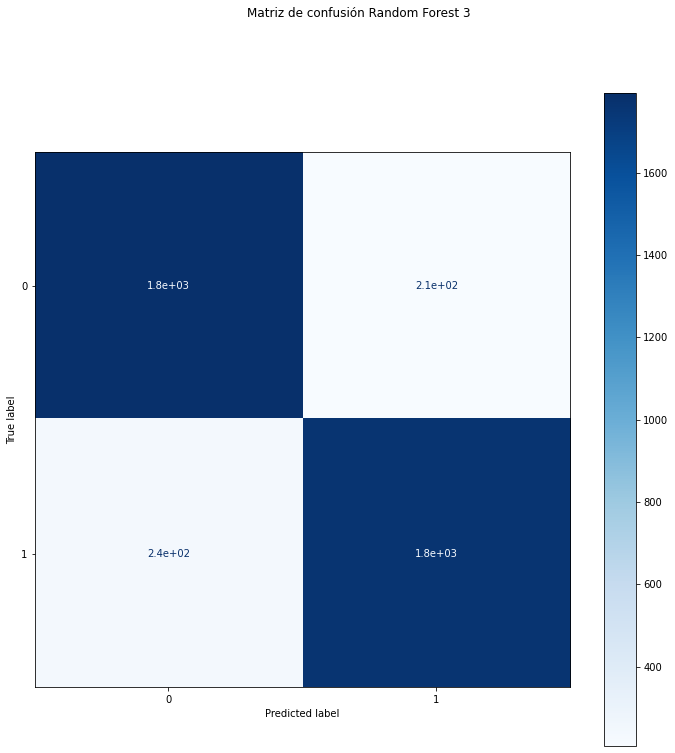

In [86]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = plot_confusion_matrix(random_forest3, xdev_3, ydev_3, ax=ax, cmap=plt.cm.Blues)
fig.suptitle("Matriz de confusión Random Forest 3")
plt.grid(False)
plt.show()

**Conclusiones del Proyecto 3**


Atendiendo a la primera pregunta de la consigna del proyecto, un problema de clasificación binaria es más manejable y permite alcanzar una mejor precisión indistinto del algoritmo. Pudimos observar que al tener este enfoque tanto el algoritmo de Linear Support Vector y Random Forest fueron superiores a cuando el enfoque del problema era multi. Una conclusión adicional es que el modelo sencillo de Gaussian Bayes Naive, si bien es fácil de aplicar es el menos potente de los 3. 

*¿Qué se esperaba y qué resultó?*

En principio se esperaba que un modelo binario fuera mucho más poderoso, puesto que a través del uso de palabras las que más resaltaba siempre era "no" indicando una expresión de calificación negativa (1-2 estrellas) y "perfecto" indicando una positiva (4-5 estrellas), en tanto las expresiones intermedias siempre resultaban complejas de analizar pues combinan expresiones positivas y negativas que impiden una buena generalización. 

El resultado finalmente y como se mencionó antes fue mucho mejor para un enfoque binario que a lo largo del ejercicio se fue justificando al analizar las métricas de precisión y F1 score, asi como las matrices de confusión con cada algoritmo y posible mejora como la ampliación de los n-gramas. 

**Investigación**

Al final la consigna propone la explicación de cosas a probar. En primer lugar vale la pena hacer un análisis detallado de esas expresiones intermedias a partir de un análisis más preciso de las mismas por la frecuencia otorgada y el conjunto de palabras. Cuando se tiene un enfoque binario es sencillo pues las palabras "no" y "perfecto" son sencillas de asignar y determinar una clasificación, en tanto, un análisis de sentimiento de las intermedias que comprenden un conjunto de palabras sería interesante. 

Una librería que podría ayudar en esta tarea y que es popularmente usada para sentimientos en tweets es TextBlob que permite procesar texto. Esta permite hacer análsis de un conjunto mayor de palabras como discursos, frases, etc. 

De este tipo de análisis se espera que una clasificación individual para las 5 estrellas sea posible pues permite darle gradualidad. Ya aprovechando esta herramienta, es posible a continuación hacer uso de GridSearch que son mucho más densos en el rendimiento de la máquina pero que podría encontrar un mejor algoritmo a los usados en el ejercicio para clasificar, luego de la ayuda de TextBlob, las 5 estrellas. 










